# Organize MatLab Dataset as Pandas Dataframe.

In [1]:
import pandas as pd
import numpy as np
import zipfile
import h5py
import glob
import os
import random
import matplotlib.pyplot as plt
from pathlib import Path

## Getting the Dataset.

#### The files were obtained in the link https://figshare.com/articles/brain_tumor_dataset/1512427. More information can be found in the reference.

## Unzip files

#### To unzip files, fill the correct path run the following cell.

In [2]:
zip_path = Path('../Datasets/MatLab_DS/')
zip_files = glob.glob(os.path.join(zip_path, '*.zip'))

for zip_f in zip_files:
    zipfile.ZipFile(zip_f, 'r').extractall(zip_path)

## Get information from all slices.

In [3]:
slices_folder = Path('../Datasets/MatLab_DS/')
slices = sorted(glob.glob(os.path.join(slices_folder, '*.mat')))

fields = ['image', 'tumorMask', 'tumorBorder', 'PID', 'label']

df_data = []

for curr_slice in slices:
    f = h5py.File(curr_slice, 'r')

    image, mask, border, P_id, label = list(map(lambda field: f.get('cjdata/' + field), fields))

    image = np.array(image)
    mask = np.array(mask)
    border = np.array(border)
    P_id = "".join([chr(number) for number in np.array(P_id)])
    label = np.array(label)[0][0]
    orig_filename = os.path.basename(curr_slice)

    slice_info = [orig_filename, P_id, image, mask, border, label]
    df_data.append(slice_info)

#orig_filename, P_id, image.shape, mask.shape, border.shape, label
len(df_data), len(df_data[0])

(3064, 6)

In [10]:
df = pd.DataFrame(df_data, columns=['Orig_File','Patient_ID', 'Slice_Image', 'Tumor_Mask', 'Tumor_Border', 'Tumor_Label'])
df.to_pickle(os.path.join(slices_folder, 'matlab_ds.pickle'))

In [4]:
slices_folder = Path('../Datasets/MatLab_DS/')
df = pd.read_pickle(os.path.join(slices_folder, 'matlab_ds.pickle'))

In [8]:
df.head()

,Orig_File,Patient_ID,Slice_Image,Tumor_Mask,Tumor_Border,Tumor_Label
0,1.mat,100360,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[267.6152450090744, 231.37568058076226, 277.8...",1.0
1,10.mat,101016,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[248.86411149825784, 256.89198606271776, 238....",1.0
2,100.mat,107494,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[193.26370732550265, 175.8076305348121, 185.1...",1.0
3,1000.mat,112649,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[225.95188511210213, 231.1718956592464, 233.4...",3.0
4,1001.mat,112649,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[231.61100841767436, 237.4012836281162, 241.0...",3.0


### Visualize an image example.

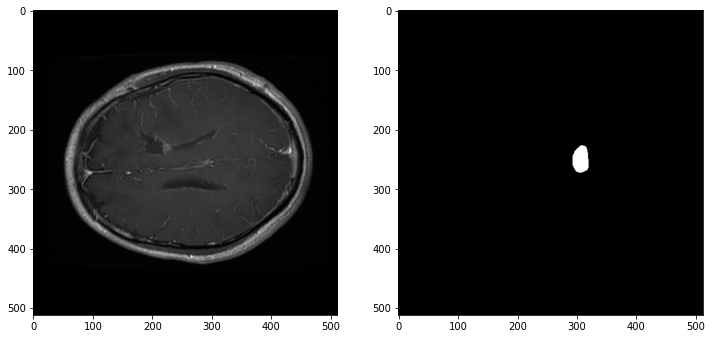

In [21]:
image = random.choice(df.Slice_Image)
mask = random.choice(df.Tumor_Mask)

fig = plt.figure(figsize=(12,8))

sub1 = fig.add_subplot(1,2,1)
sub1.imshow(image, cmap='gray')

sub2 = fig.add_subplot(1,2,2)
sub2.imshow(mask, cmap='gray')

plt.show()

## Remove .mat files to clear directory.

In [4]:
remove_all_mat = list(map(lambda slice: os.remove(slice), slices))